In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
139,170 cases (7 day average) as of Fri 07 Jan, -5,919.1 since Thu 06 Jan
2,010 hospitalised (7 day average) as of Mon 10 Jan, -5.6 since Sun 09 Jan
161 died (7 day average) as of Fri 07 Jan, +17.3 since Thu 06 Jan


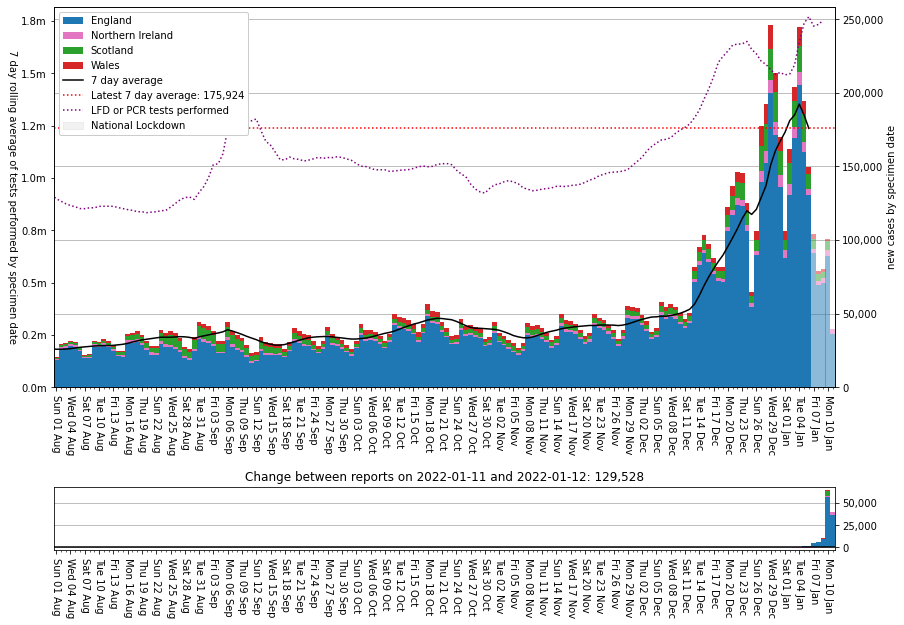

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

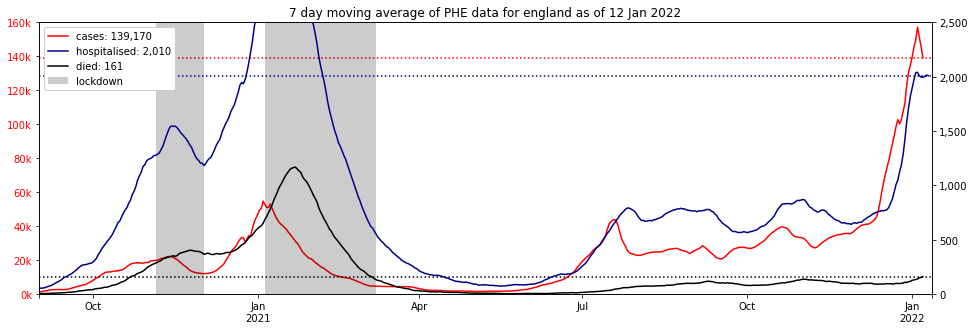

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=160_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2500)

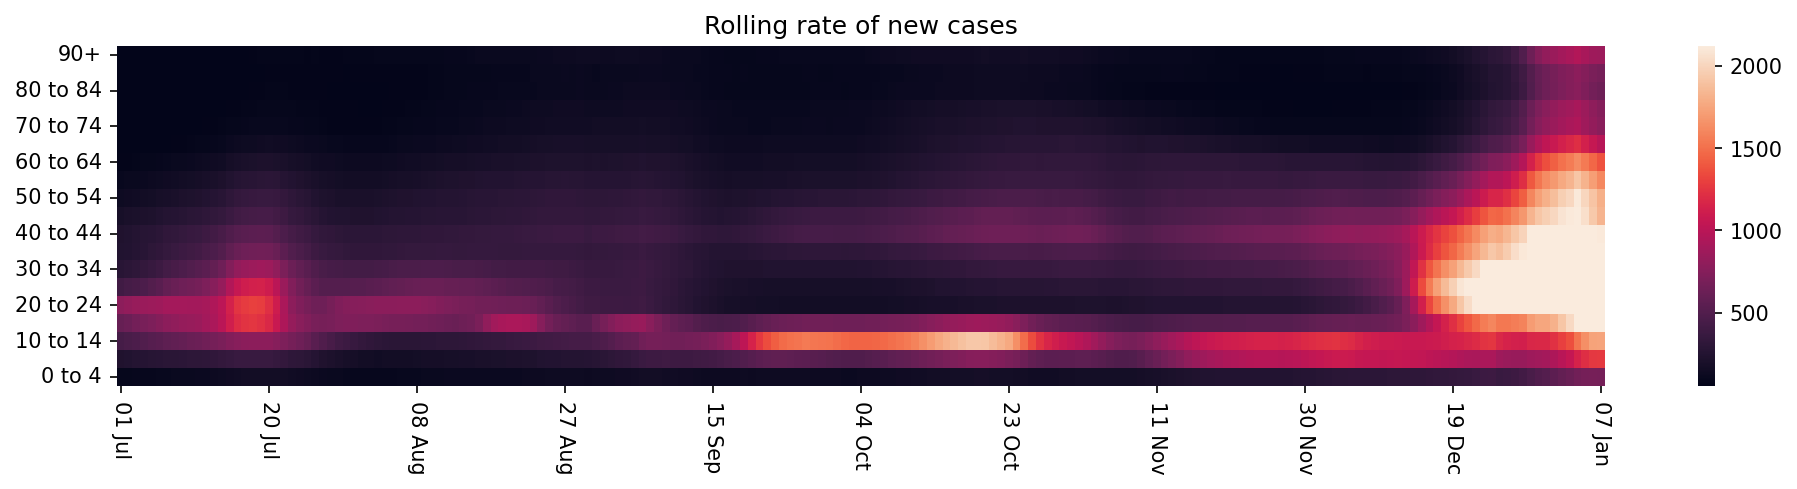

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

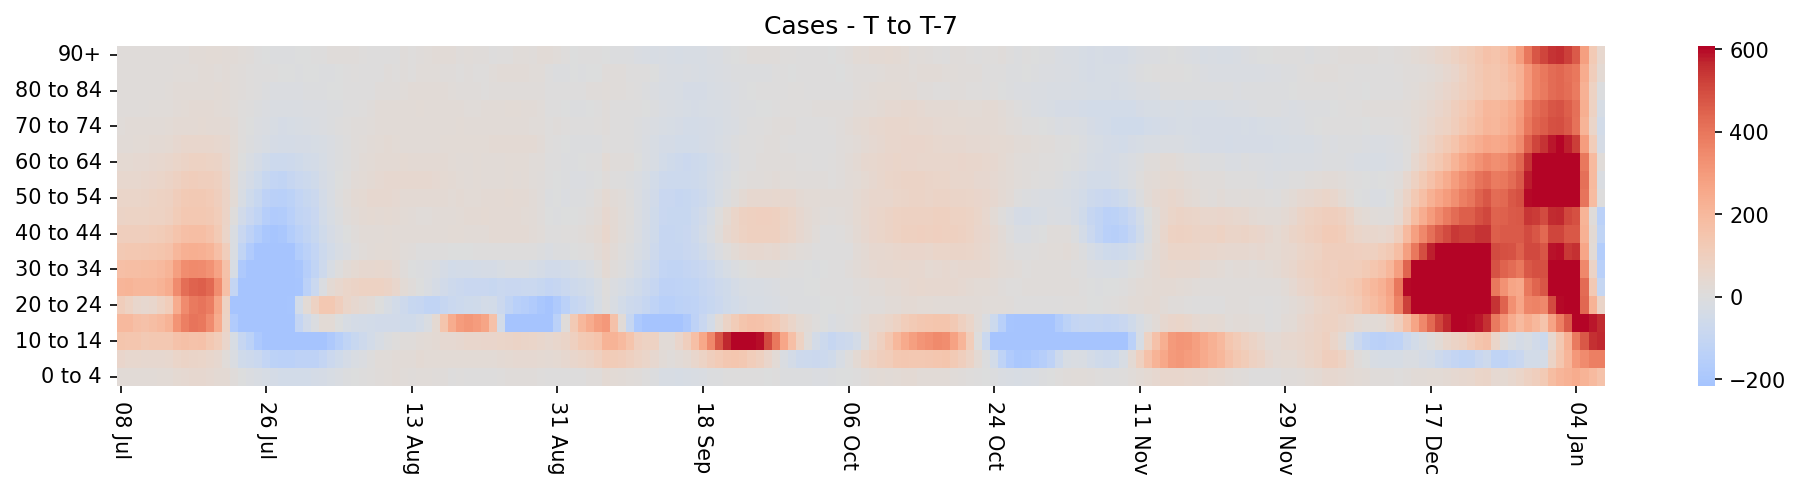

In [6]:
heatmap(diff(data, days=7), title='Cases - T to T-7', figsize=(16, 3), center=0, cmap='coolwarm')

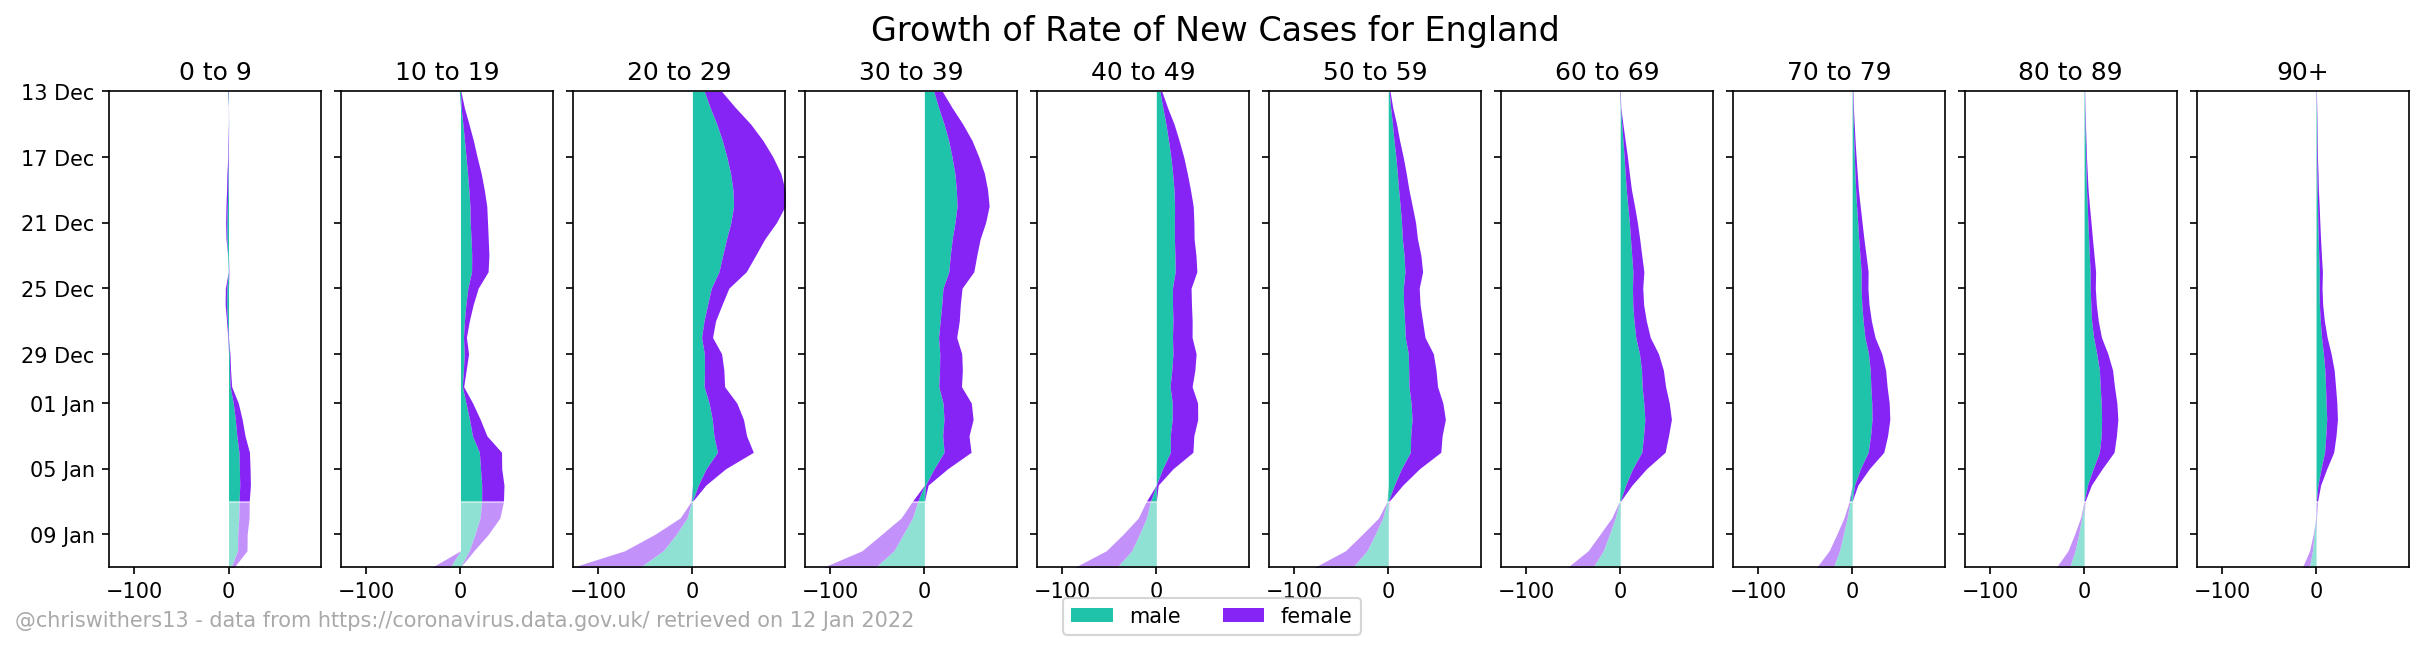

In [7]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

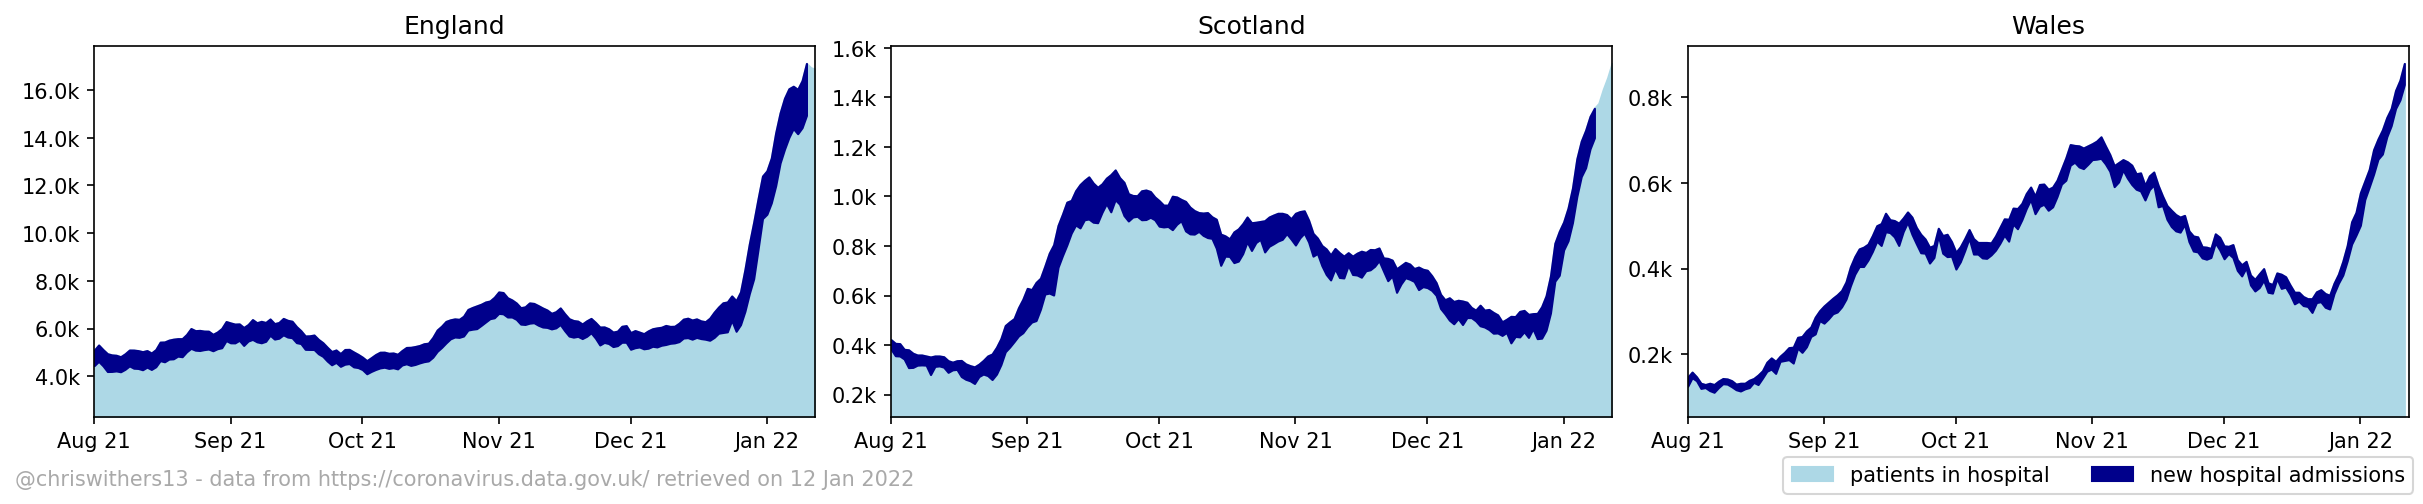

In [8]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

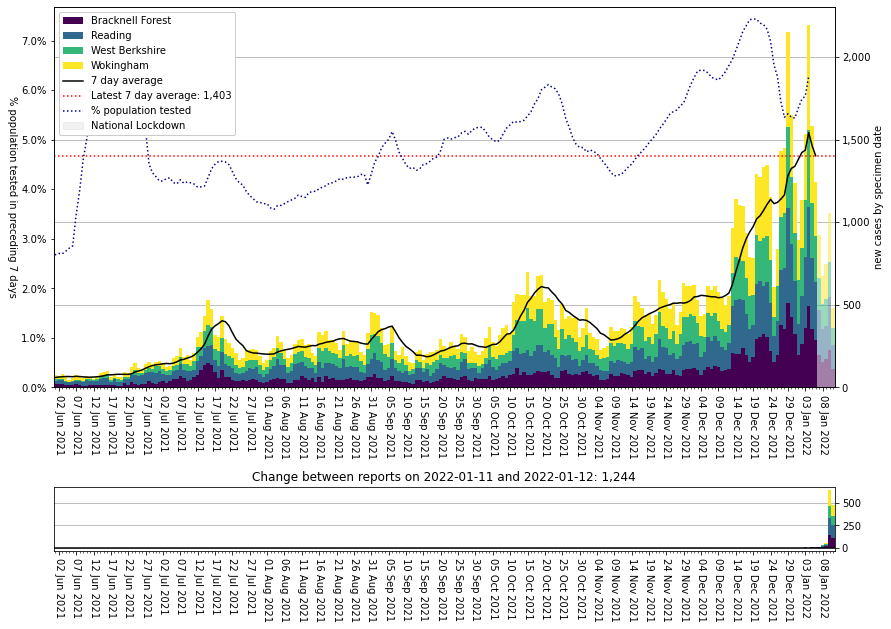

In [9]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

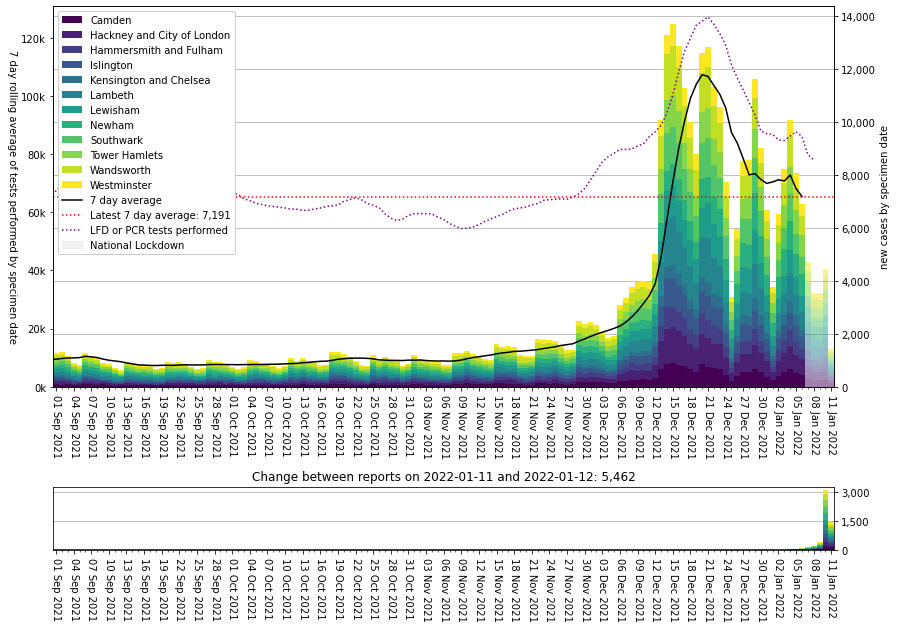

In [10]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [11]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                 
E06000002            Middlesbrough         2776.989644   
E06000001               Hartlepool         2668.075975   
E08000023           South Tyneside         2502.384485   
E06000004         Stockton-on-Tees         2487.990757   
E08000024               Sunderland         2472.047676   
E06000003     Redcar and Cleveland         2379.146919   
N09000005  Derry City and Strabane         2369.715238   
E08000022           North Tyneside         2355.793048   
E07000117                  Burnley         2234.592892   
E06000057           Northumberland         2225.571745   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E06000002                  3915.0    2022-01-10  
E06000001                  2499.0    2022-01-10  
E08000023                  3778.0    2022-01-10  
E06000004                  4910.0    2022-01-10  
E08000024                  6865.0    2022-01-10  
E06000003                  3263.0    2022-01-10  
N09000005                  3585.0    2022-01-10  
E08000022                  4898.0    2022-01-10  
E07000117                  1987.0    2022-01-10  
E06000057                  7176.0    2022-01-10

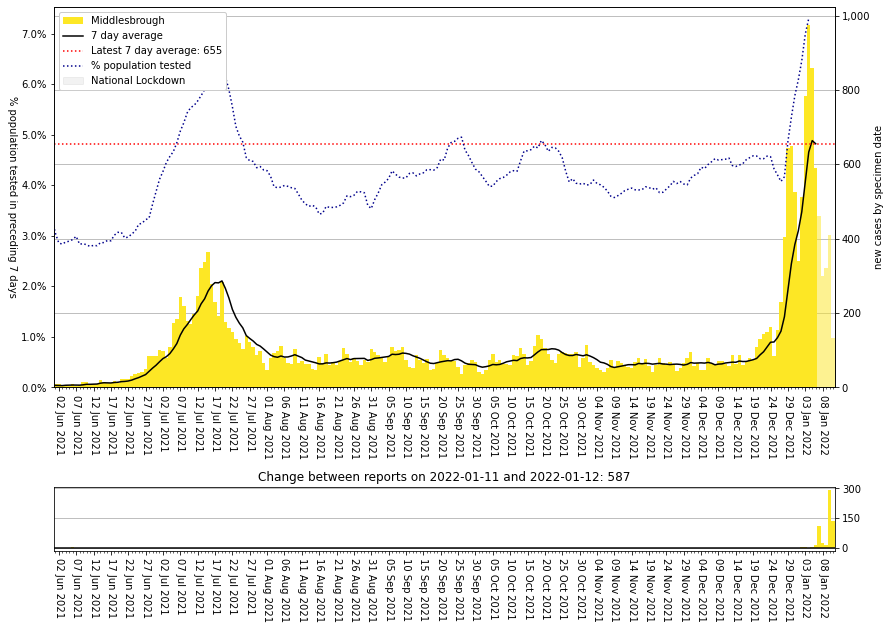

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                
E08000025      Birmingham         1473.354726                 16823.0   
E08000035           Leeds         1709.410330                 13558.0   
E06000047   County Durham         2065.105434                 10947.0   
E08000032        Bradford         1732.014762                  9349.0   
E08000019       Sheffield         1578.345328                  9231.0   
E08000003      Manchester         1591.367042                  8798.0   
S12000049    Glasgow City         1355.509224                  8582.0   
E08000012       Liverpool         1674.758354                  8341.0   
E08000034        Kirklees         1738.796281                  7647.0   
E06000057  Northumberland         2225.571745                  7176.0   

          Specimen date  
areaCode                 
E08000025    2022-01-10  
E08000035    2022-01-10  
E06000047    2022-01-10  
E08000032    2022-01-10  
E08000019    2022-01-10  
E08000003    2022-01-10  
S12000049    2022-01-10  
E08000012    2022-01-10  
E08000034    2022-01-10  
E06000057    2022-01-10

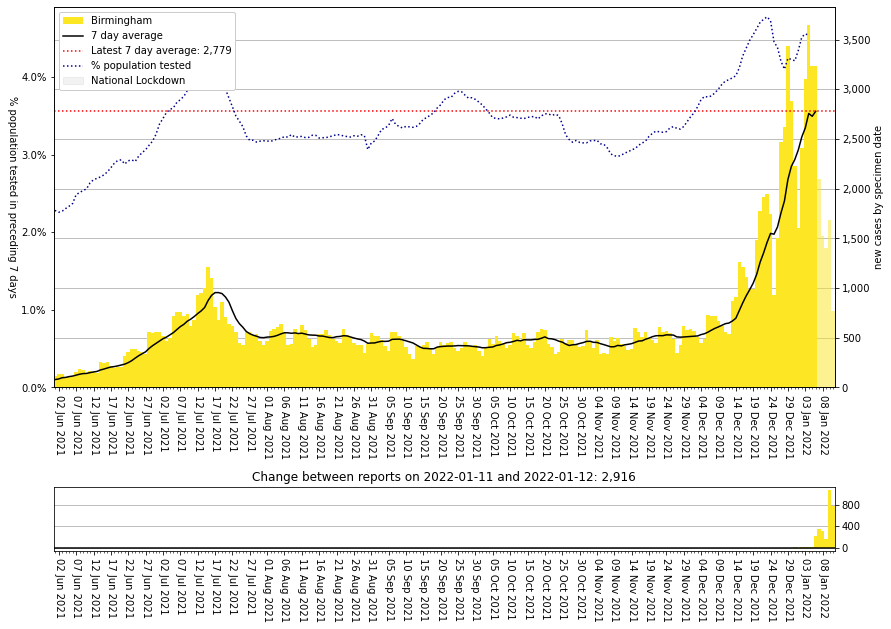

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

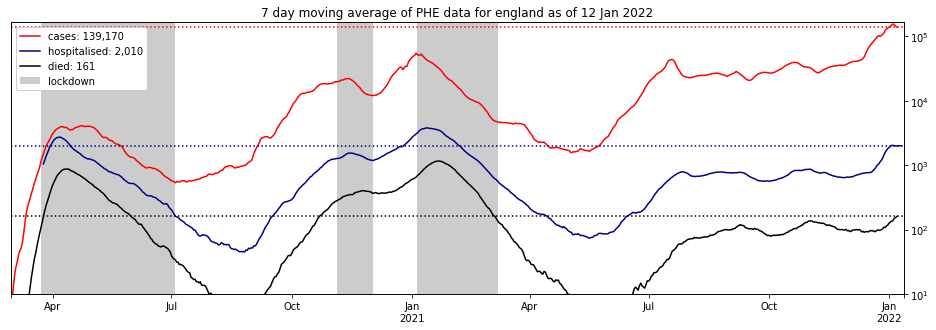

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

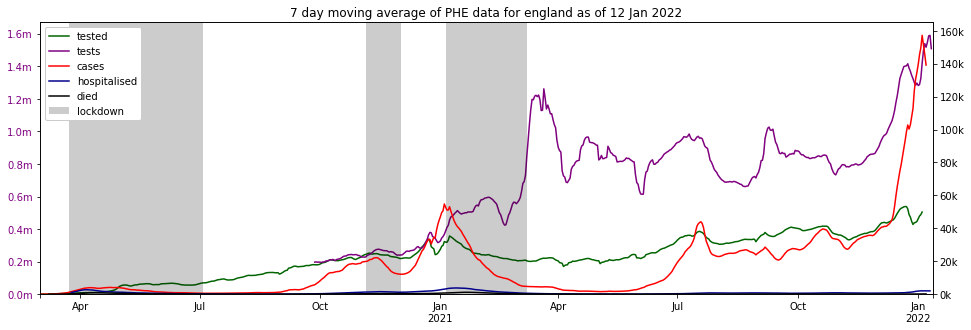

In [17]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

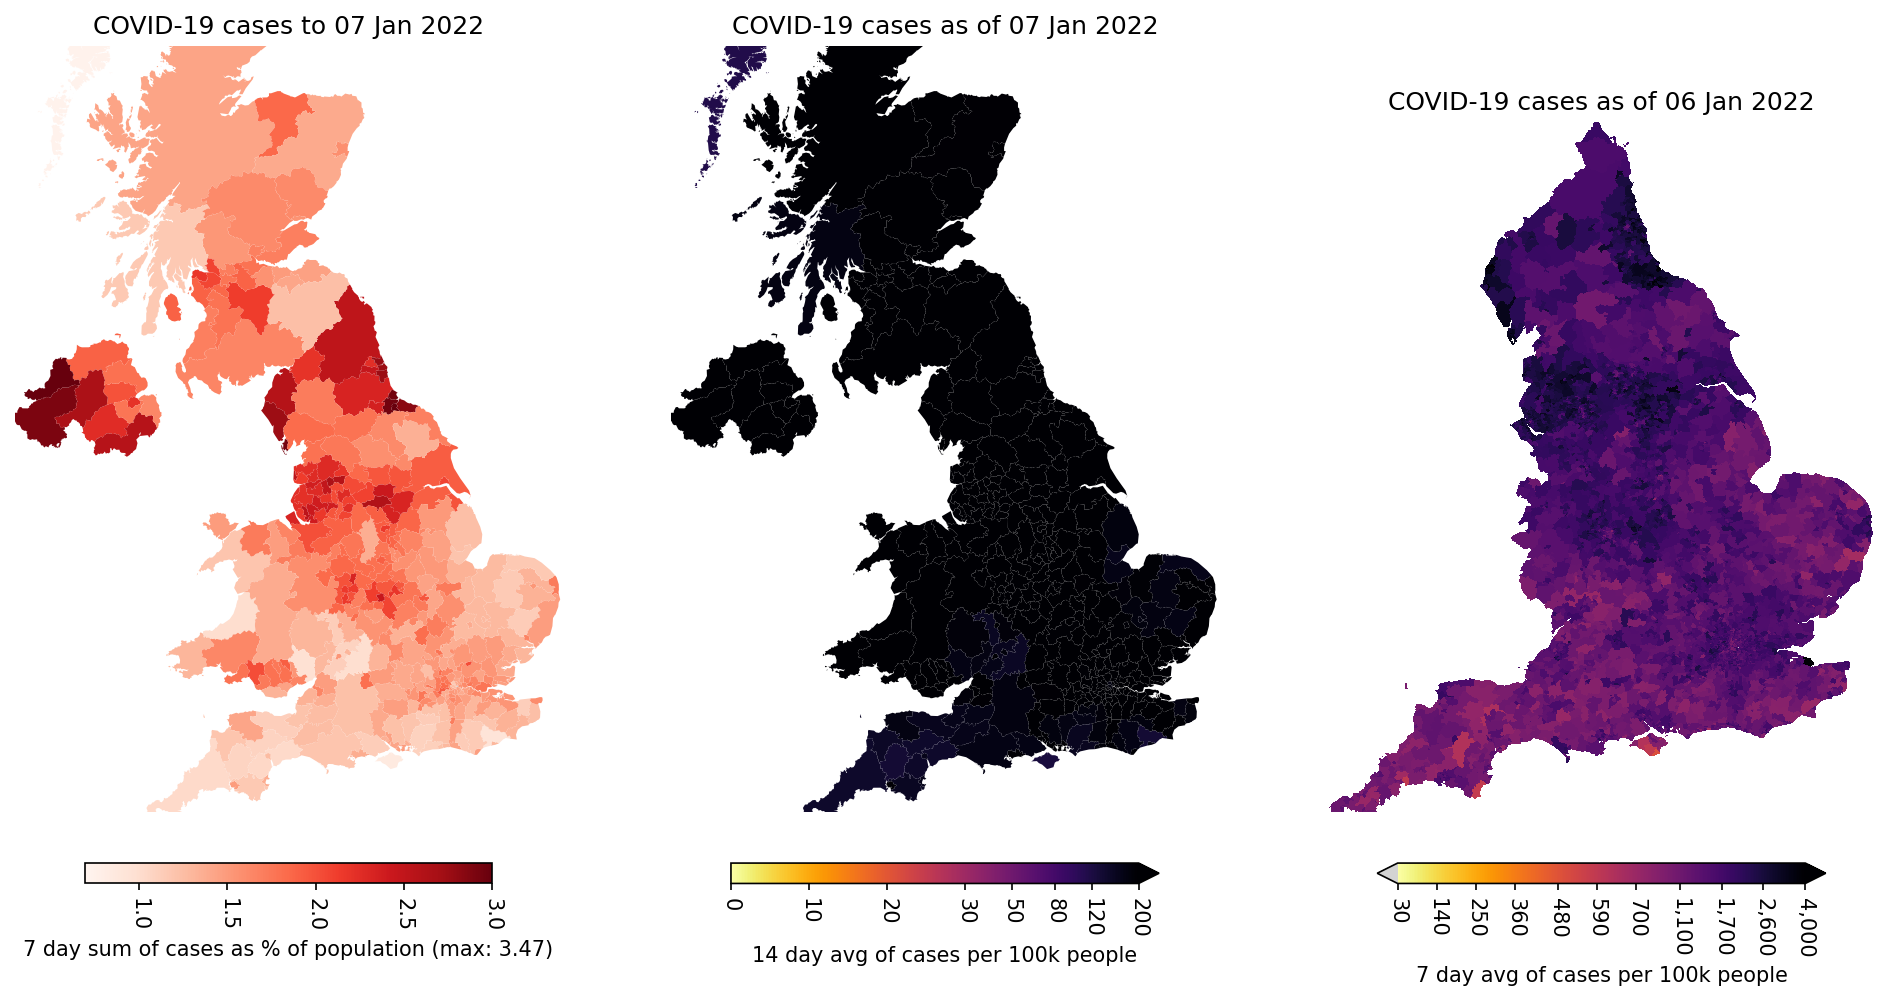

Loading BokehJS ...

In [18]:
case_maps(sum_vmax=3.0, exclude_days=4)